# Netflix Data Analysis Project

This project explores the Netflix dataset using **Pandas** and **Matplotlib**. The objective is to analyze content trends, distributions, and release patterns to derive meaningful insights.

## Project Overview

- Data cleaning and preprocessing using Pandas
- Exploratory Data Analysis (EDA)
- Visualizations using Matplotlib
- Insights derived from trends and distributions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')


In [3]:
# clean data

df = df.dropna(subset=['type','release_year','rating','country','duration'])


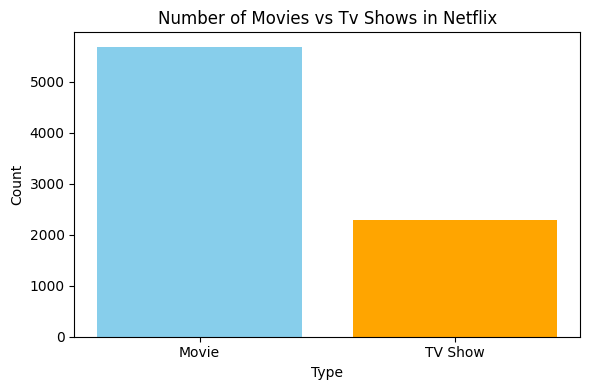

In [4]:
type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=['skyblue','orange'])
plt.title('Number of Movies vs Tv Shows in Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies VS Tv Shows.png',dpi=300)
plt.show()

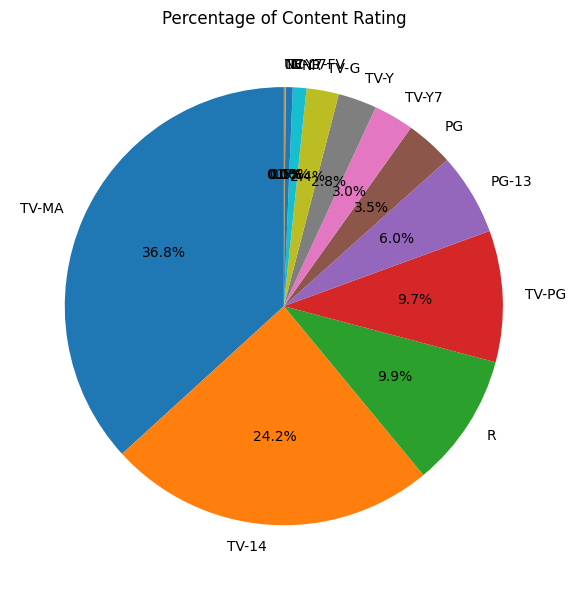

In [5]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Content Rating')
plt.tight_layout()
plt.savefig('Content Rating Pie.png',dpi=300)
plt.show()

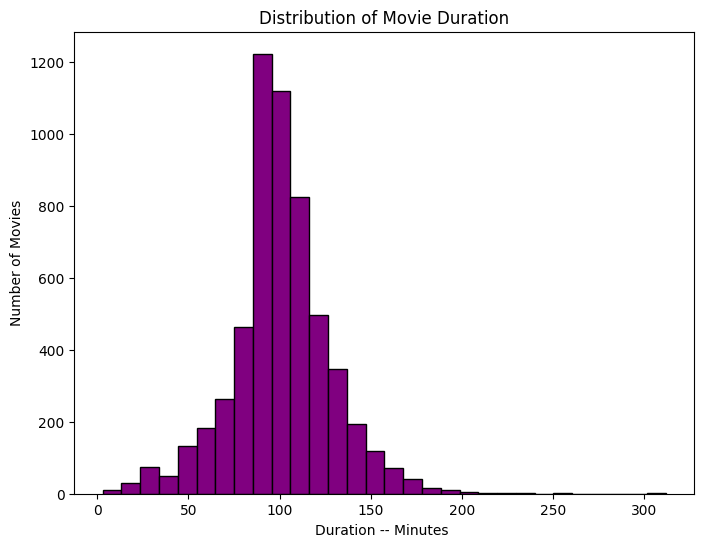

In [6]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'],bins=30,color=['purple'],edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration -- Minutes ')
plt.ylabel('Number of Movies')
plt.savefig('Movie Duration Histogram.png',dpi=300)
plt.show()

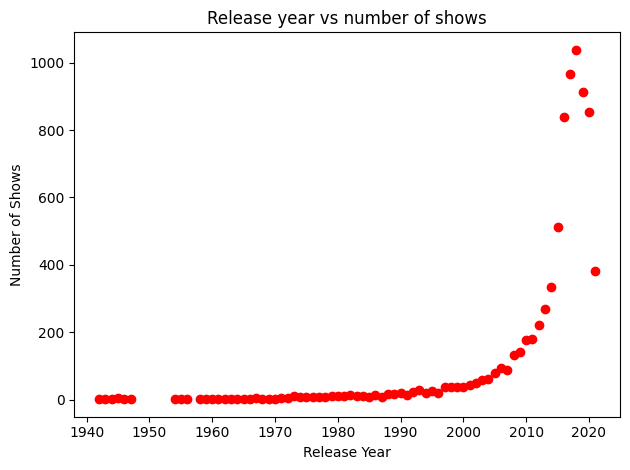

In [7]:
release_count = df['release_year'].value_counts().sort_index()
plt.Figure(figsize=(10,6))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('Release year vs number of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('Release Year vs Number of Shows.png')
plt.show()

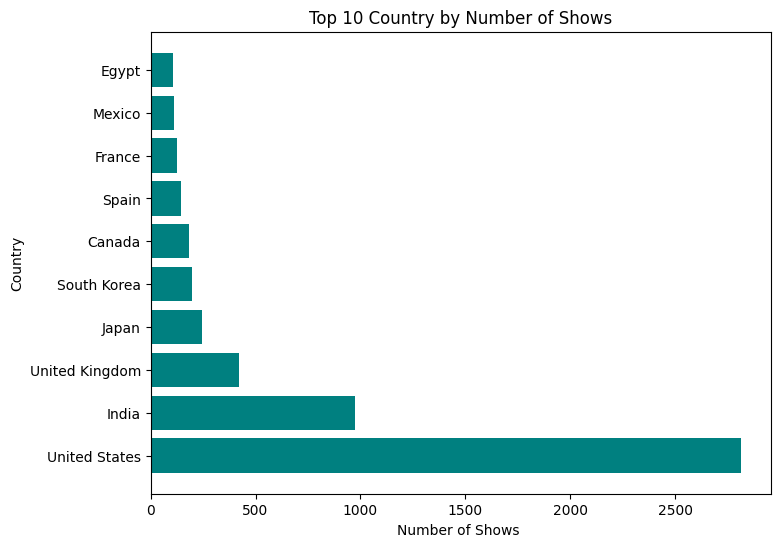

In [10]:
country_count = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color='teal')
plt.title('Top 10 Country by Number of Shows')
plt.xlabel('Number of Shows ')
plt.ylabel('Country')
plt.savefig('Top 10 Country.png')
plt.show()

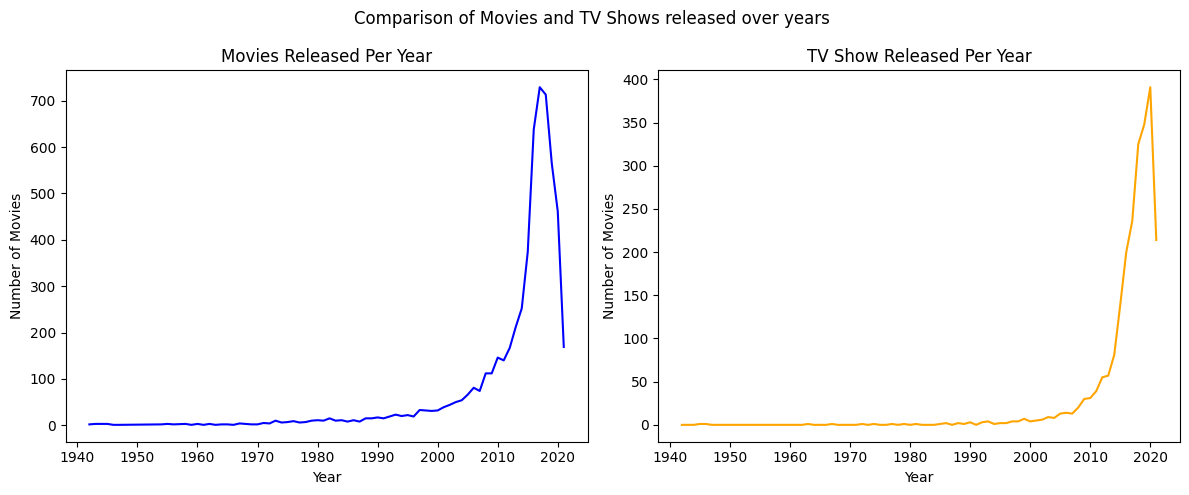

In [13]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig , ax = plt.subplots(1,2,figsize=[12,5])
#First Subplot:Movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')


#Second Subplot:Movies
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('TV Show Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows released over years ')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()


## Key Insights

- Netflix has released significantly more **Movies** than **TV Shows** overall.
- Content releases increased rapidly after 2015.
- Most movie durations fall within a common mid-range of minutes.
- The United States contributes the highest number of titles on Netflix.